# Countries energy insight 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Load all CSVs từ 2019 đến 2025
all_files = sorted(glob.glob("monthly_hourly_load_values_*.xlsx"))
df_list = [pd.read_excel(file) for file in all_files]
pre_df = pd.concat(df_list, ignore_index=True)


C:\Users\anhmi\anaconda3\envs\cse2\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\anhmi\anaconda3\envs\cse2\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\anhmi\anaconda3\envs\cse2\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\anhmi\anaconda3\envs\cse2\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
pre_df

,MeasureItem,DateUTC,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,CreateDate,UpdateDate
0,Monthly Hourly Load Values,2019-01-01 00:00:00,2019-01-01,1970-01-01 00:00:00,1970-01-01 01:00:00,AT,100,5852.50,5852.50,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
1,Monthly Hourly Load Values,2019-01-01 01:00:00,2019-01-01,1970-01-01 01:00:00,1970-01-01 02:00:00,AT,100,5619.20,5619.20,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
2,Monthly Hourly Load Values,2019-01-01 02:00:00,2019-01-01,1970-01-01 02:00:00,1970-01-01 03:00:00,AT,100,5323.90,5323.90,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
3,Monthly Hourly Load Values,2019-01-01 03:00:00,2019-01-01,1970-01-01 03:00:00,1970-01-01 04:00:00,AT,100,5273.30,5273.30,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
4,Monthly Hourly Load Values,2019-01-01 04:00:00,2019-01-01,1970-01-01 04:00:00,1970-01-01 05:00:00,AT,100,5439.00,5439.00,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
...,...,...,...,...,...,...,...,...,...,...,...
1909419,Monthly Hourly Load Values,2025-03-31 19:00:00,2025-03-31,1970-01-01 19:00:00,1970-01-01 20:00:00,XK,100,863.25,863.25,2025-06-04 09:35:31.480,2025-06-04 09:35:31.480
1909420,Monthly Hourly Load Values,2025-03-31 20:00:00,2025-03-31,1970-01-01 20:00:00,1970-01-01 21:00:00,XK,100,876.63,876.63,2025-06-04 09:35:31.480,2025-06-04 09:35:31.480
1909421,Monthly Hourly Load Values,2025-03-31 21:00:00,2025-03-31,1970-01-01 21:00:00,1970-01-01 22:00:00,XK,100,879.89,879.89,2025-06-04 09:35:31.480,2025-06-04 09:35:31.480
1909422,Monthly Hourly Load Values,2025-03-31 22:00:00,2025-03-31,1970-01-01 22:00:00,1970-01-01 23:00:00,XK,100,796.14,796.14,2025-06-04 09:35:31.480,2025-06-04 09:35:31.480


In [3]:
# Chọn cột cần thiết
pre_df = pre_df[['CountryCode', 'DateUTC', 'Value']]

# Tính range (max - min) theo từng quốc gia
country_stats = (
    pre_df.groupby('CountryCode')['Value']
    .agg(['min', 'max'])
    .assign(range=lambda x: x['max'] - x['min'])
    .sort_values(by='range', ascending=False)
)

In [4]:

# Chọn 3 quốc gia: dao động cao, trung bình, thấp
top_range = country_stats.iloc[0].name
mid_range = country_stats.iloc[len(country_stats)//2].name
low_range = country_stats.iloc[-1].name

selected_countries = [top_range, mid_range, low_range, 'AT']
print("Selected countries:", selected_countries)

Selected countries: ['FR', 'AT', 'LU', 'AT']


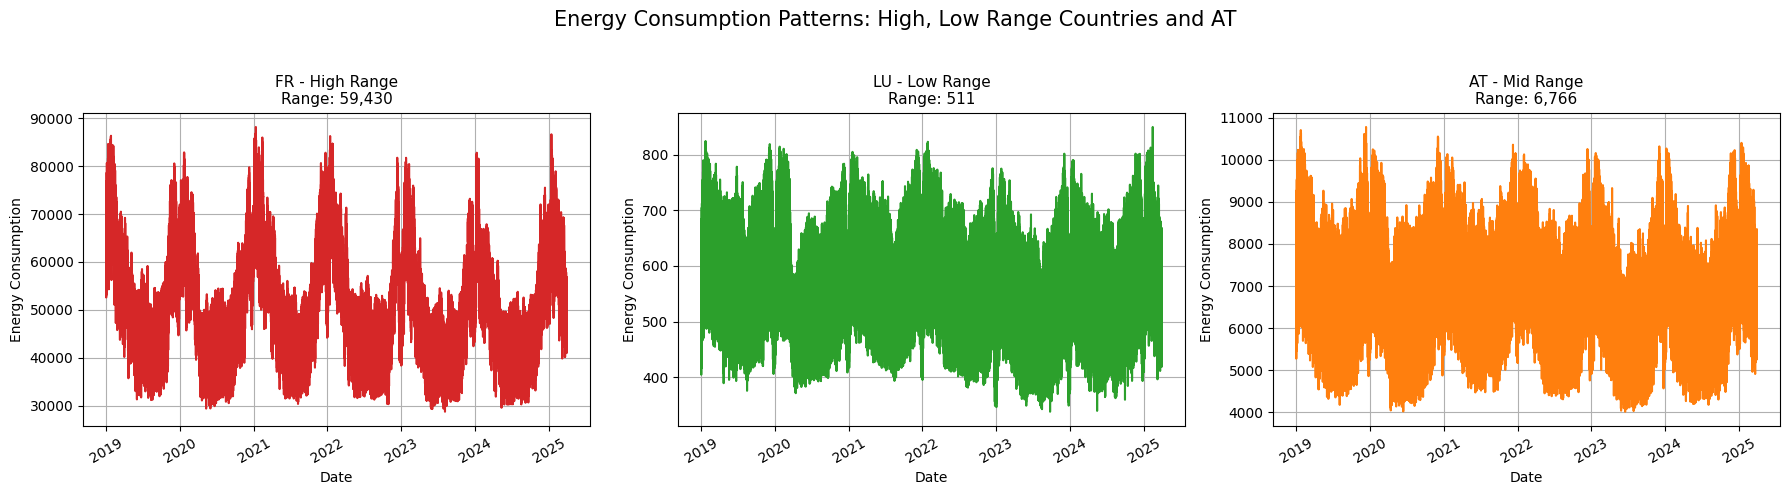

In [5]:
import matplotlib.pyplot as plt

# Ánh xạ label và màu
label_map = {
    top_range: "High Range",
    low_range: "Low Range",
    'AT': "Mid Range"
}

color_map = {
    top_range: 'tab:red',
    low_range: 'tab:green',
    'AT': 'tab:orange'
}

selected_countries = [top_range, low_range, 'AT']

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=False)

for i, country in enumerate(selected_countries):
    subset = pre_df[pre_df['CountryCode'] == country]
    subset = subset.groupby('DateUTC')['Value'].mean().reset_index()
    range_val = subset['Value'].max() - subset['Value'].min()

    axs[i].plot(subset['DateUTC'], subset['Value'],
                color=color_map[country], linewidth=1.5)
    
    axs[i].set_title(f"{country} - {label_map[country]}\nRange: {range_val:,.0f}", fontsize=11)
    axs[i].tick_params(axis='x', rotation=30)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Energy Consumption")
    axs[i].grid(True)

fig.suptitle("Energy Consumption Patterns: High, Low Range Countries and AT", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


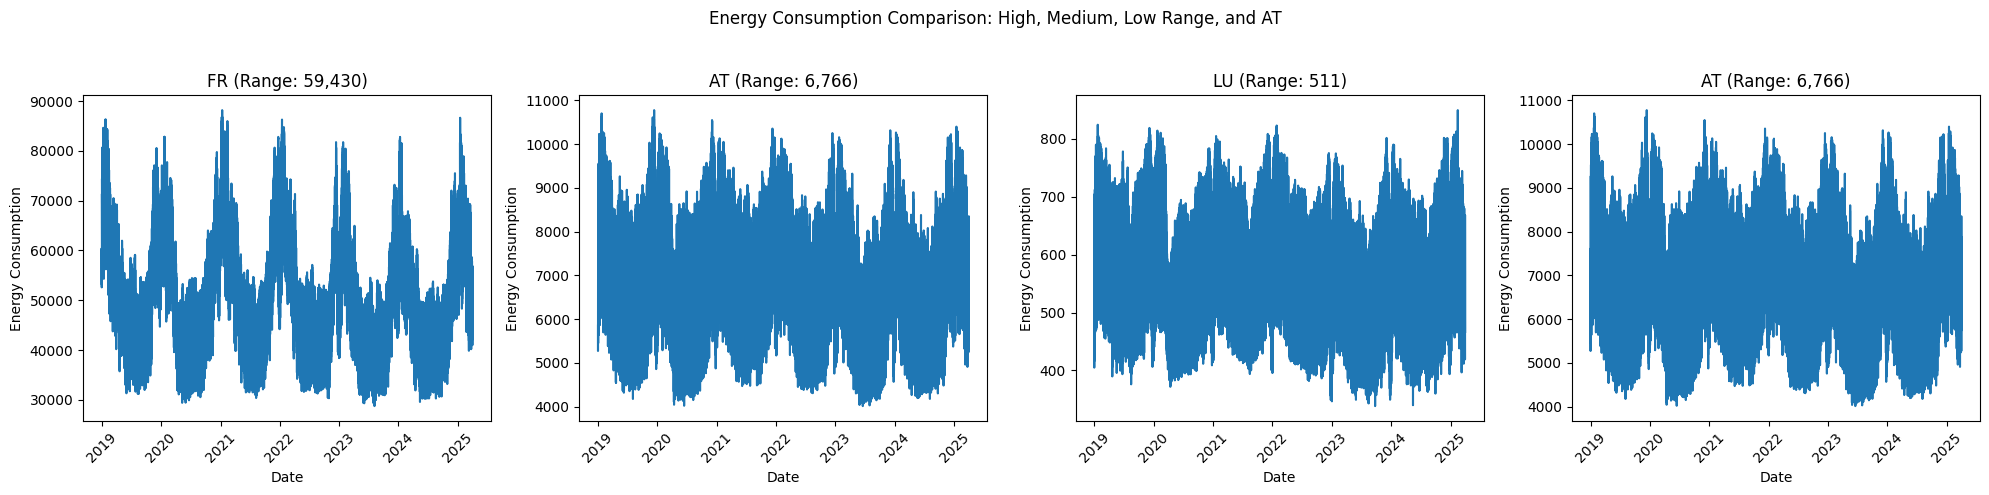

In [6]:
import matplotlib.pyplot as plt

selected_countries = [top_range, mid_range, low_range, 'AT']
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex=True)

for i, country in enumerate(selected_countries):
    subset = pre_df[pre_df['CountryCode'] == country]
    subset = subset.groupby('DateUTC')['Value'].mean().reset_index()

    axs[i].plot(subset['DateUTC'], subset['Value'], color='tab:blue')
    axs[i].set_title(f"{country} (Range: {subset['Value'].max() - subset['Value'].min():,.0f})")
    axs[i].set_xlabel('Date')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel('Energy Consumption')

plt.suptitle('Energy Consumption Comparison: High, Medium, Low Range, and AT')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 1. IMPORT LIBRARIES
----------------------

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Dense, Dropout, LSTM, GRU, SimpleRNN,
    Conv1D, MaxPooling1D, GlobalAveragePooling1D,
    Flatten, Attention, BatchNormalization, Reshape
)


from tensorflow.keras.optimizers import Adam

# 2. LOAD, EDA DATA & SPLIT DATA
------------------------------

In [9]:
# Hiển thị đẹp
pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv("preprocessed_energy_data_AT_2019_2025.csv")
df

,DateUTC,MeasureItem,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,hour,dayofweek,month,year
0,2019-01-01 00:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 00:00:00,1970-01-01 01:00:00,AT,100,5852.5,5852.5,0,1,1,2019
1,2019-01-01 01:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 01:00:00,1970-01-01 02:00:00,AT,100,5619.2,5619.2,1,1,1,2019
2,2019-01-01 02:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 02:00:00,1970-01-01 03:00:00,AT,100,5323.9,5323.9,2,1,1,2019
3,2019-01-01 03:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 03:00:00,1970-01-01 04:00:00,AT,100,5273.3,5273.3,3,1,1,2019
4,2019-01-01 04:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 04:00:00,1970-01-01 05:00:00,AT,100,5439.0,5439.0,4,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54763,2025-03-31 19:00:00,Monthly Hourly Load Values,2025-03-31,1970-01-01 19:00:00,1970-01-01 20:00:00,AT,100,7196.0,7196.0,19,0,3,2025
54764,2025-03-31 20:00:00,Monthly Hourly Load Values,2025-03-31,1970-01-01 20:00:00,1970-01-01 21:00:00,AT,100,6896.8,6896.8,20,0,3,2025
54765,2025-03-31 21:00:00,Monthly Hourly Load Values,2025-03-31,1970-01-01 21:00:00,1970-01-01 22:00:00,AT,100,6434.1,6434.1,21,0,3,2025
54766,2025-03-31 22:00:00,Monthly Hourly Load Values,2025-03-31,1970-01-01 22:00:00,1970-01-01 23:00:00,AT,100,6102.1,6102.1,22,0,3,2025


In [12]:
print("Kích thước tập dữ liệu:", df.shape)
print("\n Các cột dữ liệu:", df.columns.tolist())
print("\n Missing values:\n", df.isnull().sum())
print("\n Dòng trùng lặp:", df.duplicated().sum())
print("\n Thống kê cơ bản Value:\n", df['Value'].describe())


Kích thước tập dữ liệu: (54768, 13)

 Các cột dữ liệu: ['DateUTC', 'MeasureItem', 'DateShort', 'TimeFrom', 'TimeTo', 'CountryCode', 'Cov_ratio', 'Value', 'Value_ScaleTo100', 'hour', 'dayofweek', 'month', 'year']

 Missing values:
 DateUTC             0
MeasureItem         0
DateShort           0
TimeFrom            0
TimeTo              0
CountryCode         0
Cov_ratio           0
Value               0
Value_ScaleTo100    0
hour                0
dayofweek           0
month               0
year                0
dtype: int64

 Dòng trùng lặp: 0

 Thống kê cơ bản Value:
 count    54768.000000
mean      6973.847712
std       1332.788551
min       4013.500000
25%       5907.575000
50%       6922.400000
75%       7930.725000
max      10779.000000
Name: Value, dtype: float64


In [13]:
print("\n Cov_ratio stats (độ phủ dữ liệu):\n", df['Cov_ratio'].describe())


 Cov_ratio stats (độ phủ dữ liệu):
 count    54768.0
mean       100.0
std          0.0
min        100.0
25%        100.0
50%        100.0
75%        100.0
max        100.0
Name: Cov_ratio, dtype: float64


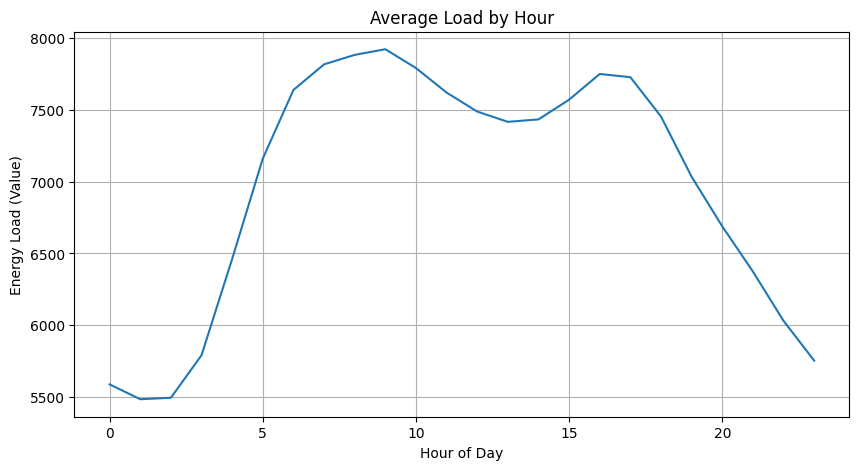

In [14]:
plt.figure(figsize=(10,5))
df.groupby('hour')['Value'].mean().plot()
plt.title("Average Load by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Energy Load (Value)")
plt.grid()
plt.show()


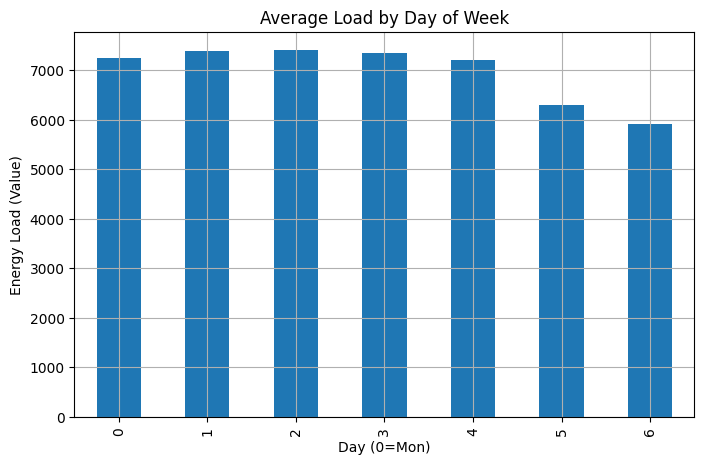

In [15]:
plt.figure(figsize=(8,5))
df.groupby('dayofweek')['Value'].mean().plot(kind='bar')
plt.title("Average Load by Day of Week")
plt.xlabel("Day (0=Mon)")
plt.ylabel("Energy Load (Value)")
plt.grid()
plt.show()


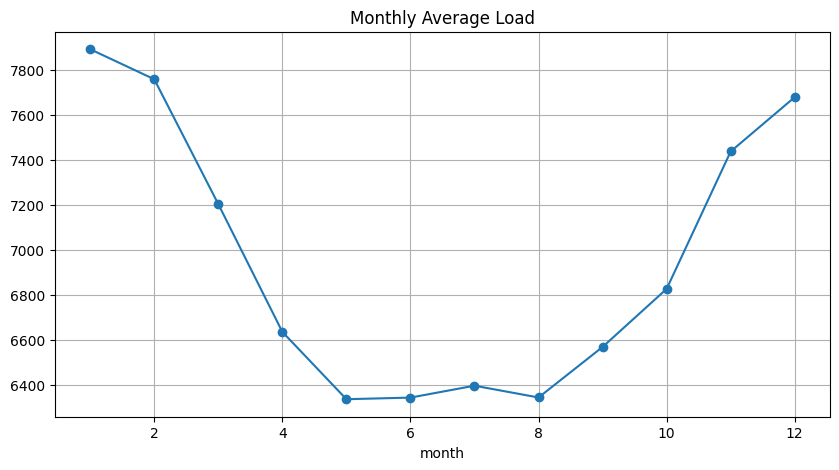

In [16]:
plt.figure(figsize=(10,5))
df.groupby('month')['Value'].mean().plot(marker='o')
plt.title("Monthly Average Load")
plt.grid()
plt.show()


## Train test split

In [17]:
df['DateUTC'] = pd.to_datetime(df['DateUTC'])
df.set_index('DateUTC', inplace=True)

# Training: 2019–2024, Testing: 2025
train_df_full = df[df.index.year < 2025]
test_df = df[df.index.year == 2025]

# Split validation from end of 2024 (10% of training)
val_ratio = 0.1
val_size = int(len(train_df_full) * val_ratio)
val_df = train_df_full.iloc[-val_size:]
train_df = train_df_full.iloc[:-val_size]

# In thông tin tóm tắt
print("Train shape:", train_df.shape)
print("Validiont shape:", val_df.shape)
print("Test shape:", test_df.shape)



Train shape: (47348, 12)
Validiont shape: (5260, 12)
Test shape: (2160, 12)


# 3. SCALING & SEQUENCE CREATION
------------------------------

In [18]:
def create_sequences(data, seq_len=24, output_len=1):
    X, y = [], []
    for i in range(seq_len, len(data) - output_len + 1):
        X.append(data[i - seq_len:i])
        y.append(data[i:i + output_len].flatten())
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
scaler.fit(df[['Value']])
train_scaled = scaler.transform(train_df[['Value']])
val_scaled   = scaler.transform(val_df[['Value']])
test_scaled  = scaler.transform(test_df[['Value']])

seq_len = 24
output_len = 1

X_train, y_train = create_sequences(train_scaled, seq_len, output_len)
X_val, y_val     = create_sequences(val_scaled, seq_len, output_len)
X_test, y_test   = create_sequences(test_scaled, seq_len, output_len)

# 4. METRICS FUNCTION
------------------------------

In [19]:
def evaluate_model(y_true, y_pred, scaler=None):
    y_true = np.squeeze(y_true)
    y_pred = np.squeeze(y_pred)
    if scaler:
        y_true = scaler.inverse_transform(y_true.reshape(-1, 1))
        y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return round(rmse, 2), round(mae, 2), round(mape, 2), y_true, y_pred

# 5. MODEL DEFINITIONS
-----------------------------

## a. Best Ensemble-base model: XGboost

In [19]:
# def build_xgboost():
#     return XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)

In [20]:
# X_train_xgb = X_train.reshape(X_train.shape[0], -1)
# X_test_xgb = X_test.reshape(X_test.shape[0], -1)
# y_train_xgb = y_train.ravel()
# y_test_xgb = y_test.ravel()

# preds_dict = {}
# results = []
# print("Training XGBoost...")
# xgb = build_xgboost()
# xgb.fit(X_train_xgb, y_train_xgb)
# y_pred_xgb = xgb.predict(X_test_xgb).reshape(-1, 1)
# rmse, mae, mape, _, y_pred_inv = evaluate_model(y_test, y_pred_xgb, scaler)
# preds_dict["XGBoost"] = y_pred_inv
# results.append({"Model": "XGBoost", "RMSE": rmse, "MAE": mae, "MAPE": mape})

Training XGBoost...


## b. Best Deeplearning-base models: GRU & LSTM

In [21]:
# def build_lstm(input_shape, output_len=1):
#     model = Sequential()
#     model.add(LSTM(64, input_shape=input_shape))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(output_len))
#     return model

# def build_gru(input_shape, output_len=1):
#     model = Sequential()
#     model.add(GRU(64, input_shape=input_shape))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(output_len))
#     return model

# def build_lstm_gru(input_shape, output_len=1):
#     model = Sequential()
#     model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
#     model.add(GRU(32))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(output_len))
#     return model

## c. Best hybrid models:

In [22]:
# def build_dnn_cnn_attention(input_shape, output_len=1):
#     inputs = Input(shape=input_shape)

#     x = Flatten()(inputs)
#     x = Dense(128, activation='relu')(x)

#     # Reshape lại để CNN + Attention
#     reshaped_dim = 16
#     x = Dense(reshaped_dim * 8, activation='relu')(x)
#     x = Reshape((8, reshaped_dim))(x)  # (batch, time, features)

#     x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(x)
#     x = Attention()([x, x])
#     x = GlobalAveragePooling1D()(x)

#     x = Dense(64, activation='relu')(x)
#     outputs = Dense(output_len)(x)
#     return Model(inputs, outputs)


# def build_dnn_lstm_attention(input_shape, output_len=1):
#     inputs = Input(shape=input_shape)

#     x = Flatten()(inputs)
#     x = Dense(128, activation='relu')(x)
#     x = Dropout(0.2)(x)

#     # Reshape để LSTM đọc chuỗi
#     x = Dense(64 * 2)(x)
#     x = Reshape((2, 64))(x)  # 2 time steps, 64 features

#     x = LSTM(64, return_sequences=True)(x)
#     x = Attention()([x, x])
#     x = Flatten()(x)

#     x = Dense(64, activation='relu')(x)
#     outputs = Dense(output_len)(x)
#     return Model(inputs, outputs)


# # Hybrid - DNN + GRU + Attention (NEW)
# def build_dnn_gru_attention(input_shape, output_len=1):
#     inputs = Input(shape=input_shape)

#     x = Flatten()(inputs)
#     x = Dense(128, activation='relu')(x)
#     x = Dropout(0.2)(x)

#     # Reshape để GRU hoạt động đúng
#     x = Dense(64 * 2)(x)
#     x = Reshape((2, 64))(x)

#     x = GRU(64, return_sequences=True)(x)
#     x = Attention()([x, x])
#     x = Flatten()(x)

#     x = Dense(64, activation='relu')(x)
#     outputs = Dense(output_len)(x)
#     return Model(inputs, outputs)


In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model
import numpy as np

class PositionalEncoding(Layer):
    def __init__(self, max_len, d_model):
        super().__init__()
        pos = np.arange(max_len)[:, np.newaxis]
        i = np.arange(d_model)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
        angle_rads = pos * angle_rates

        # apply sin to even indices and cos to odd indices
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        self.pos_encoding = tf.constant(angle_rads[np.newaxis, ...], dtype=tf.float32)

    def call(self, x):
        return x + self.pos_encoding[:, :tf.shape(x)[1], :]

class EnhancedInformerEncoderBlock(Layer):
    def __init__(self, d_model, num_heads, ff_dim, dropout_rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(ff_dim // 2, activation='relu'),
            Dense(d_model),
        ])
        self.layernorm1 = LayerNormalization()
        self.layernorm2 = LayerNormalization()
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, x, training=False):
        attn_output = self.att(x, x, attention_mask=None)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def build_informer_single(input_shape, output_len=1, d_model=64, num_heads=4, ff_dim=256, num_blocks=2, dropout=0.1):
    seq_len = input_shape[0]

    inputs = Input(shape=input_shape)  # (seq_len, features)
    # Step 1: Initial Dense Projection
    x = Dense(d_model, activation='relu')(inputs)
    x = Dense(d_model)(x)

    # Step 2: Temporal Convolution to capture local patterns
    x = tf.keras.layers.Conv1D(filters=d_model, kernel_size=3, padding='causal', activation='relu')(x)
    x = Dropout(dropout)(x)

    # Step 3: Positional Encoding
    x = PositionalEncoding(max_len=seq_len, d_model=d_model)(x)

    # Step 4: Stacked Informer-style Attention Blocks
    for _ in range(num_blocks):
        x = EnhancedInformerEncoderBlock(d_model, num_heads, ff_dim, dropout_rate=dropout)(x)

    # Step 5: Global average pooling (sequence -> single vector)
    x = GlobalAveragePooling1D()(x)

    # Step 6: Fully Connected Head
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(32, activation='relu')(x)

    outputs = Dense(output_len)(x)

    return Model(inputs, outputs)

In [47]:
from tensorflow.keras.layers import (
    Dense, Dropout, LayerNormalization, Input, MultiHeadAttention,
    GlobalAveragePooling1D, Conv1D, Add
)

class GRN(tf.keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.1):
        super().__init__()
        self.units = units
        self.fc1 = Dense(units, activation='relu')
        self.dropout = Dropout(dropout_rate)
        self.fc2 = Dense(units)
        self.gate = Dense(units, activation='sigmoid')
        self.layernorm = LayerNormalization()
        self.residual_proj = None

    def build(self, input_shape):
        input_dim = input_shape[-1]
        if input_dim != self.units:
            self.residual_proj = Dense(self.units)

    def call(self, x, context=None):
        if context is not None:
            context = tf.broadcast_to(context[:, None, :], [tf.shape(x)[0], tf.shape(x)[1], tf.shape(context)[-1]])
            x = tf.concat([x, context], axis=-1)

        x_proj = self.fc1(x)
        x_proj = self.dropout(x_proj)
        x_proj = self.fc2(x_proj)
        gate_out = self.gate(x)
        x_gated = gate_out * x_proj

        if self.residual_proj is not None:
            x = self.residual_proj(x)

        return self.layernorm(x + x_gated)

class VariableSelection(tf.keras.layers.Layer):
    def __init__(self, num_features, d_model):
        super().__init__()
        self.num_features = num_features
        self.d_model = d_model
        self.weights_dense = Dense(num_features)
        self.softmax = tf.keras.layers.Softmax(axis=-1)
        self.projections = [Dense(d_model) for _ in range(num_features)]

    def call(self, x):  # x: (batch, time, features)
        weights = self.softmax(self.weights_dense(x))  # (batch, time, features)
        proj_features = [proj(x[..., i:i+1]) for i, proj in enumerate(self.projections)]
        proj_stack = tf.stack(proj_features, axis=-2)  # (batch, time, features, d_model)
        weighted = tf.reduce_sum(weights[..., None] * proj_stack, axis=-2)  # (batch, time, d_model)
        return weighted

def build_tft_single(input_shape, output_len=1, d_model=64, num_heads=4, ff_dim=128, dropout=0.2):
    seq_len, num_features = input_shape
    inputs = Input(shape=input_shape)  # (batch, seq_len, num_features)

    # Step 1: Variable selection network
    varsel = VariableSelection(num_features=num_features, d_model=d_model)
    x = varsel(inputs)  # (batch, seq_len, d_model)

    # Step 2: Temporal convolution block (expand receptive field like CNN)
    conv = Conv1D(filters=d_model, kernel_size=3, padding='same', activation='relu')(x)
    conv = Dropout(dropout)(conv)
    x = Add()([x, conv])  # residual

    # Step 3: Temporal GRN
    x = GRN(units=d_model)(x)

    # Step 4: Multi-head attention with residual and norm
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model, dropout=dropout)(x, x)
    x = Add()([x, attn_output])
    x = LayerNormalization()(x)

    # Step 5: Feedforward GRN block
    x = GRN(units=ff_dim)(x)

    # Step 6: Second attention (optional - deep stacking)
    attn_output2 = MultiHeadAttention(num_heads=num_heads, key_dim=d_model, dropout=dropout)(x, x)
    x = Add()([x, attn_output2])
    x = LayerNormalization()(x)
    x = GRN(units=ff_dim)(x)

    # Step 7: Sequence pooling
    pooled = GlobalAveragePooling1D()(x)

    # Step 8: Final MLP
    dense = Dense(128, activation='relu')(pooled)
    dense = Dropout(dropout)(dense)
    dense = Dense(64, activation='relu')(dense)
    output = Dense(output_len)(dense)

    return Model(inputs, output)

In [23]:
# deep conv with batchnormalization and dropout
# def build_cnn_lstm_attention_v1(input_shape, output_len=1):
#     inputs = Input(shape=input_shape)

#     # Block 1
#     x = Conv1D(64, 3, padding='same', activation='relu')(inputs)
#     x = Conv1D(64, 3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling1D(2)(x)

#     # Block 2
#     x = Conv1D(128, 3, padding='same', activation='relu')(x)
#     x = Conv1D(128, 3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling1D(2)(x)

#     # Block 3
#     x = Conv1D(256, 3, padding='same', activation='relu')(x)
#     x = Conv1D(256, 3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling1D(2)(x)

#     # Block 4
#     x = Conv1D(512, 3, padding='same', activation='relu')(x)
#     x = Conv1D(512, 3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling1D(2)(x)

#     # LSTM + Attention
#     x = LSTM(64, return_sequences=True)(x)
#     x = Attention()([x, x])
#     x = GlobalAveragePooling1D()(x)

#     # Dense
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.3)(x)
#     outputs = Dense(output_len)(x)
#     return Model(inputs, outputs)

# def build_cnn_lstm_attention_v2(input_shape, output_len=1):
#     inputs = Input(shape=input_shape)

#     # CNN Blocks
#     x = Conv1D(64, 3, activation='relu', padding='same')(inputs)
#     x = Conv1D(64, 3, activation='relu', padding='same')(x)
#     x = MaxPooling1D(2)(x)

#     x = Conv1D(128, 3, activation='relu', padding='same')(x)
#     x = Conv1D(128, 3, activation='relu', padding='same')(x)
#     x = MaxPooling1D(2)(x)

#     # Deep LSTM + Attention
#     x = LSTM(64, return_sequences=True)(x)
#     x = LSTM(32, return_sequences=True)(x)
#     x = Attention()([x, x])
#     x = Flatten()(x)

#     # Dense
#     x = Dense(64, activation='relu')(x)
#     outputs = Dense(output_len)(x)
#     return Model(inputs, outputs)

# 6. TRAINING FUNCTION
------------------------------

In [21]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    model.compile(optimizer=Adam(1e-4), loss='mse')
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    return model, history

# 7. MAIN LOOP TO TRAIN MODELS
------------------------------

In [22]:
def train_model_group(model_dict, group_name, X_train, y_train, X_val, y_val, X_test, y_test, scaler, output_len=1, epochs=20):
    results = []
    preds_dict = {}

    for name, build_fn in model_dict.items():
        print(f"\n[Group: {group_name}] Training {name}...")
        model = build_fn(X_train.shape[1:], output_len=output_len)
        model, _ = train_model(model, X_train, y_train, X_val, y_val, epochs=epochs)

        # Predict
        y_pred = model.predict(X_test)
        rmse, mae, mape, y_true, y_pred_inv = evaluate_model(y_test, y_pred, scaler)

        # Save results
        preds_dict[name] = y_pred_inv
        results.append({"Model": f"{group_name} - {name}", "RMSE": rmse, "MAE": mae, "MAPE": mape})

    return results, preds_dict

In [ ]:
# # 1. Deep Learning Group
# dl_models = {
#     "LSTM": build_lstm,
#     "GRU": build_gru,
#     "LSTM_GRU": build_lstm_gru
# }

# dl_results, dl_preds = train_model_group(
#     dl_models, group_name="DL",
#     X_train=X_train, y_train=y_train,
#     X_val=X_val, y_val=y_val,
#     X_test=X_test, y_test=y_test,
#     scaler=scaler, output_len=1, epochs=20
# )

In [48]:
# 2. Hybrid Attention Group
hybrid_models = {
    # "DNN + CNN + Attention": build_dnn_cnn_attention,
    # "DNN + LSTM + Attention": build_dnn_lstm_attention,
    # "DNN + GRU + Attention": build_dnn_gru_attention,
    # "CNN + LSTM + Attention v1": build_cnn_lstm_attention_v1,
    # "CNN + LSTM + Attention v2": build_cnn_lstm_attention_v2
    #"Informer": build_informer_single
    "TFT": build_tft_single
}

hybrid_results, hybrid_preds = train_model_group(
    hybrid_models, group_name="Hybrid",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test,
    scaler=scaler, output_len=1, epochs=20
)


[Group: Hybrid] Training TFT...
Epoch 1/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 111s 38ms/step - loss: 0.0333 - val_loss: 0.0026
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - loss: 9.9912e-04 - val_loss: 0.0047
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - loss: 8.6089e-04 - val_loss: 0.0042
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - loss: 7.6735e-04 - val_loss: 0.0027
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - loss: 7.2496e-04 - val_loss: 0.0040
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - loss: 6.7800e-04 - val_loss: 0.0032
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 82

C:\Users\anhmi\anaconda3\envs\cse2\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 24, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


# 8. EVALUATION SUMMARY & PREDICTION PLOT
------------------------------

In [28]:
 try:
    all_results_df
except NameError:
    all_results_df = pd.DataFrame()

# Sau đó ghép tiếp
all_results_df = pd.concat([
    all_results_df,
    pd.DataFrame(results)
], ignore_index=True).sort_values(by="RMSE")


In [49]:
from IPython.display import display, HTML

# Make notebook cells wider
display(HTML("<style>.container { width:100% !important; }</style>"))

# Combine all results from DL, Hybrid, and XGBoost (multistep)
all_results_df = pd.concat([
    #pd.DataFrame(dl_results),         # deep learning models
    pd.DataFrame(hybrid_results),     # hybrid attention models
    #pd.DataFrame(results)                # traditional models (e.g., XGBoost)
], ignore_index=True)

# Sort and display
all_results_df = all_results_df.sort_values(by="RMSE")
display(all_results_df)


,Model,RMSE,MAE,MAPE
0,Hybrid - TFT,488.56,424.09,5.28


In [50]:
# Ensure y_train and y_test are 2D arrays before inverse scaling
y_train_flat = y_train.reshape(-1, 1)
y_test_flat = y_test.reshape(-1, 1)

# Combine ground truth values and inverse scale
y_true_scaled = np.concatenate([y_train_flat, y_test_flat])  # shape: (total_samples, 1)
y_true = scaler.inverse_transform(y_true_scaled).flatten()   # shape: (total_samples,)

# Index to mark where the test set starts (for plotting later)
split_idx = len(y_train_flat)


In [51]:
import numpy as np
import matplotlib.pyplot as plt

def plot_partial_predictions(y_true, preds_dict, split_idx, group_title, window_size=1000, start_idx=None):
    """
    Plot model predictions with ground truth for both train and test in a limited window.

    Args:
        y_true (np.array): Full ground truth values (train + test) - already inverse_scaled
        preds_dict (dict): model_name -> predicted y (inverse_scaled, test only)
        split_idx (int): index where test set starts
        group_title (str): name of group of models
        window_size (int): number of time steps to show
        start_idx (int or None): starting point of the window (default: split_idx - window_size//2)
    """
    for model_name, y_pred in preds_dict.items():
        plt.figure(figsize=(14, 5))

        # Define window
        if start_idx is None:
            start_idx = max(split_idx - window_size // 2, 0)
        end_idx = start_idx + window_size

        # Range for prediction alignment
        pred_start = split_idx
        pred_end = pred_start + len(y_pred)

        # Plot ground truth slice
        indices = np.arange(start_idx, end_idx)
        plt.plot(indices, y_true[start_idx:end_idx], label="Ground Truth", linewidth=2)

        # Plot predictions if inside visible window
        visible_pred_start = max(pred_start, start_idx)
        visible_pred_end = min(pred_end, end_idx)
        pred_visible_range = visible_pred_end - visible_pred_start
        if pred_visible_range > 0:
            pred_offset = visible_pred_start - pred_start
            plt.plot(
                np.arange(visible_pred_start, visible_pred_end),
                y_pred[pred_offset:pred_offset + pred_visible_range],
                label=model_name
            )

        # Train/Test split line
        if start_idx <= split_idx <= end_idx:
            plt.axvline(x=split_idx, color='red', linestyle='--', label="Train/Test Split")

        plt.title(f"{group_title}: {model_name}")
        plt.xlabel("Time Step")
        plt.ylabel("Energy Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [52]:

# Gộp toàn bộ các dictionary dự đoán
all_preds = {}

#all_preds.update(dl_preds)
all_preds.update(hybrid_preds)
#all_preds.update(preds_dict)


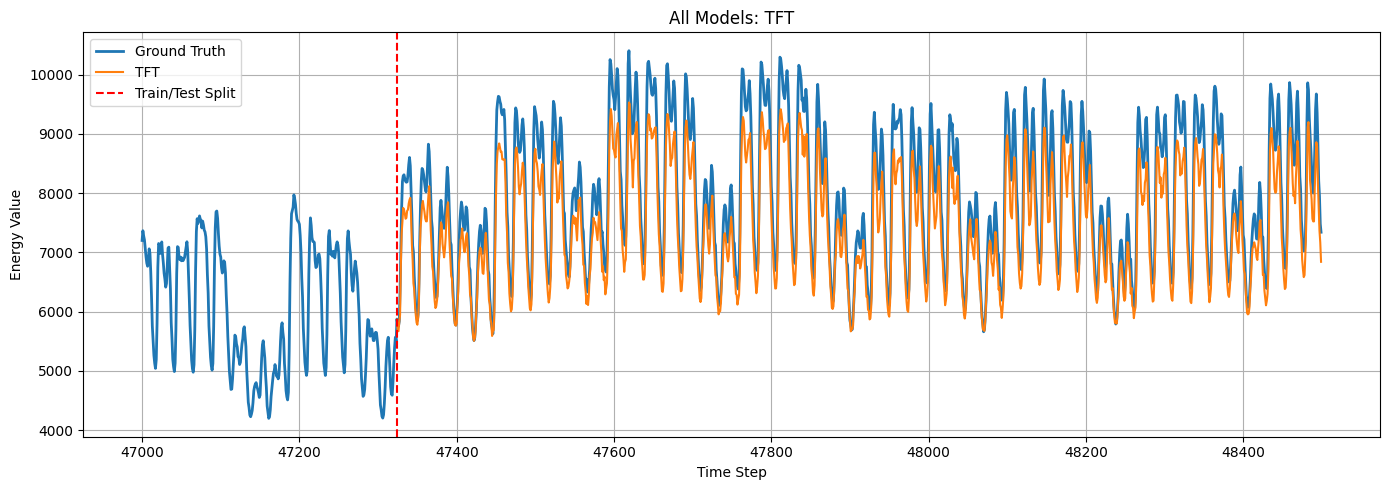

In [53]:
# y_true must be full inverse-scaled ground truth (train + test)
# split_idx = len(y_train)
# all_preds = {**dl_preds, **hybrid_preds, **preds_dict}

plot_partial_predictions(
    y_true=y_true,                  # full true values (already inverse-scaled)
    preds_dict=all_preds,           # all predictions (from test only)
    split_idx=split_idx,
    group_title="All Models",
    window_size=1500,               # show 1500 steps only
    start_idx=47000                 # focus on test region (optional)
)


# 9. multi-step forecasting (24-hour ahead)
-------------------------------------------

## a, XGBoost model

In [54]:
# Tạo dữ liệu multi-step từ series đã scale
seq_len = 24
output_len = 24

# X_train_xgb, y_train_xgb = create_sequences(train_scaled, seq_len, output_len)
# X_val_xgb, y_val_xgb     = create_sequences(val_scaled, seq_len, output_len)
# X_test_xgb, y_test_xgb   = create_sequences(test_scaled, seq_len, output_len)

# # Reshape để phù hợp XGBoost (samples, features)
# X_train_xgb = X_train_xgb.reshape(X_train_xgb.shape[0], -1)
# X_test_xgb  = X_test_xgb.reshape(X_test_xgb.shape[0], -1)

# # Flatten y cho XGBoost multioutput strategy
# y_train_xgb = y_train_xgb  # shape: (samples, 24)
# y_test_xgb  = y_test_xgb


In [58]:
# from xgboost import XGBRegressor
# from sklearn.multioutput import MultiOutputRegressor

# # Khởi tạo XGBoost + MultiOutput wrapper
# base_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# xgb_multi = MultiOutputRegressor(base_xgb)

# # Train
# xgb_multi.fit(X_train_xgb, y_train_xgb)

# # Predict
# y_pred_xgb = xgb_multi.predict(X_test_xgb)  # shape: (samples, 24)


In [66]:
# # Inverse transform dự đoán và ground truth
y_test_inv = scaler.inverse_transform(y_test_xgb.reshape(-1, 1)).reshape(y_test_xgb.shape)
y_pred_inv = scaler.inverse_transform(y_pred_xgb.reshape(-1, 1)).reshape(y_pred_xgb.shape)

# # Flatten để tính metric
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

# y_test_flat = y_test_inv.flatten()
# y_pred_flat = y_pred_inv.flatten()

# rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
# mae = mean_absolute_error(y_test_flat, y_pred_flat)
# mape = np.mean(np.abs((y_test_flat - y_pred_flat) / (y_test_flat + 1e-8))) * 100

# # Lưu kết quả
# ms_preds_dict = {}
# ms_results = []
# ms_preds_dict["XGBoost"] = y_pred_inv
# ms_results.append({"Model": "XGBoost", "RMSE": round(rmse, 2), "MAE": round(mae, 2), "MAPE": round(mape, 2)})


NameError: name 'y_test_xgb' is not defined

## b. Deeplearning-base model

In [55]:
X_train, y_train = create_sequences(train_scaled, seq_len=24, output_len=24)
X_val, y_val = create_sequences(val_scaled, seq_len=24, output_len=24)
X_test, y_test = create_sequences(test_scaled, seq_len=24, output_len=24)


In [56]:
def train_multistep_model_group(
    model_dict, group_name,
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    scaler,
    output_len=24,
    epochs=20
):
    results = []
    preds_dict = {}

    for name, build_fn in model_dict.items():
        print(f"\n[Group: {group_name}] Training {name}...")

        # Build model
        model = build_fn(X_train.shape[1:], output_len=output_len)
        model, _ = train_model(model, X_train, y_train, X_val, y_val, epochs=epochs)

        # Predict
        y_pred = model.predict(X_test)  # shape: (n_samples, output_len)

        if y_pred.shape != y_test.shape:
            print(f"Warning: Shape mismatch! y_test: {y_test.shape}, y_pred: {y_pred.shape}")
            continue

        # Inverse transform correctly
        # Reshape both to (-1, 1) for scaling, then reshape back
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
        y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)


        # Flatten both
        y_test_flat = y_test_inv.flatten()
        y_pred_flat = y_pred_inv.flatten()

        # Evaluation
        rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
        mae = mean_absolute_error(y_test_flat, y_pred_flat)
        mape = np.mean(np.abs((y_test_flat - y_pred_flat) / (y_test_flat + 1e-8))) * 100


        results.append({
            "Model": f"{group_name} - {name}",
            "RMSE": round(rmse, 2),
            "MAE": round(mae, 2),
            "MAPE": round(mape, 2)
        })

        preds_dict[name] = y_pred_inv

    return results, preds_dict, y_test_inv


In [ ]:
# # Define DL multi-step models
# dl_multistep_models = {
#     "LSTM": build_lstm,
#     "GRU": build_gru,
#     "LSTM_GRU": build_lstm_gru
# }

# # Train multi-step
# dl_ms_results, dl_ms_preds, y_test_inv1  = train_multistep_model_group(
#     model_dict=dl_multistep_models,
#     group_name="DL-Multistep",
#     X_train=X_train, y_train=y_train,
#     X_val=X_val, y_val=y_val,
#     X_test=X_test, y_test=y_test,
#     scaler=scaler,
#     output_len=24,
#     epochs=20
# )


## c. Hybrid models

In [57]:
# Define Hybrid Multi-step models
hybrid_multistep_models = {
    # "Dense + CNN + Att": build_dnn_cnn_attention,
    # "Dense + LSTM + Att": build_dnn_lstm_attention,
    # "Dense + GRU + Att": build_dnn_gru_attention,
    # "CNN + LSTM + Att.v1": build_cnn_lstm_attention_v1,
    # "CNN + LSTM + Att.v2": build_cnn_lstm_attention_v2
    "Informer": build_informer_single,
    "TFT": build_tft_single
}

# Train
hybrid_ms_results, hybrid_ms_preds, y_test_inv2 = train_multistep_model_group(
    model_dict=hybrid_multistep_models,
    group_name="Hybrid-Multistep",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test,
    scaler=scaler,
    output_len=24,
    epochs=20
)



[Group: Hybrid-Multistep] Training Informer...
Epoch 1/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - loss: 0.0606 - val_loss: 0.0130
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - loss: 0.0158 - val_loss: 0.0088
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - loss: 0.0114 - val_loss: 0.0078
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - loss: 0.0096 - val_loss: 0.0067
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - loss: 0.0087 - val_loss: 0.0067
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - loss: 0.0082 - val_loss: 0.0062
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - loss: 0.0077 - val_loss: 0.0072
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - loss: 0.0070 - val_loss: 0.0060
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms

C:\Users\anhmi\anaconda3\envs\cse2\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 24, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Epoch 1/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 91s 51ms/step - loss: 0.0691 - val_loss: 0.0192
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - loss: 0.0244 - val_loss: 0.0154
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - loss: 0.0198 - val_loss: 0.0151
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - loss: 0.0170 - val_loss: 0.0129
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 51s 35ms/step - loss: 0.0154 - val_loss: 0.0130
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 56s 38ms/step - loss: 0.0140 - val_loss: 0.0115
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 56s 38ms/step - loss: 0.0129 - val_loss: 0.0105
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - loss: 0.0120 - val_loss: 0.0103
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - loss: 0.0107 - val_loss: 0.0101
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - loss: 0.0101 - val_loss: 0.0100
Epoch 12

C:\Users\anhmi\anaconda3\envs\cse2\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 24, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


In [58]:
from IPython.display import display, HTML

# Make notebook cells wider
display(HTML("<style>.container { width:100% !important; }</style>"))

# Combine all multistep results into one DataFrame
all_multistep_results_df = pd.concat([
    # pd.DataFrame(ms_results),
    # pd.DataFrame(dl_ms_results),        # Deep Learning multistep results
    pd.DataFrame(hybrid_ms_results)        # hybrid multistep results (optional)
], ignore_index=True)

# Sort by RMSE
all_multistep_results_df = all_multistep_results_df.sort_values(by="RMSE")

# Display final result table
display(all_multistep_results_df)

,Model,RMSE,MAE,MAPE
0,Hybrid-Multistep - Informer,471.91,358.30,4.72
1,Hybrid-Multistep - TFT,616.33,448.56,5.94


In [61]:
# Gộp kết quả dự đoán từ 2 nhóm model
all_preds = {}
# all_preds.update(ms_preds_dict)
# all_preds.update(dl_ms_preds)
all_preds.update(hybrid_ms_preds)


In [62]:
import matplotlib.pyplot as plt

def plot_multistep_forecast(y_true, y_pred, steps=24, start_index=0, model_name="Model", save=False):
    """
    Plot predicted vs true values for multi-step forecasting.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(range(steps), y_true[start_index], label="Ground Truth", marker='o')
    plt.plot(range(steps), y_pred[start_index], label="Prediction", marker='x')
    plt.title(f"Multi-step Forecast - {model_name}")
    plt.xlabel("Forecast Step")
    plt.ylabel("Energy Consumption")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if save:
        plt.savefig(f"figures/{model_name.replace(' ', '_')}_forecast.png", dpi=300)
    plt.show()


In [68]:
# assert np.allclose(y_test_inv1, y_test_inv2)
y_test_inv = y_test_inv2

In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np

def find_best_fit_samples(y_true, pred_dict, model_1, model_2, top_k=3):
    errors = []

    for i in range(len(y_true)):
        err1 = mean_squared_error(y_true[i], pred_dict[model_1][i])
        err2 = mean_squared_error(y_true[i], pred_dict[model_2][i])
        total_error = err1 + err2
        errors.append((i, total_error))

    best_samples = sorted(errors, key=lambda x: x[1])[:top_k]
    return best_samples


🔍 Best-fit sample index (for Informer + TFT): 2040


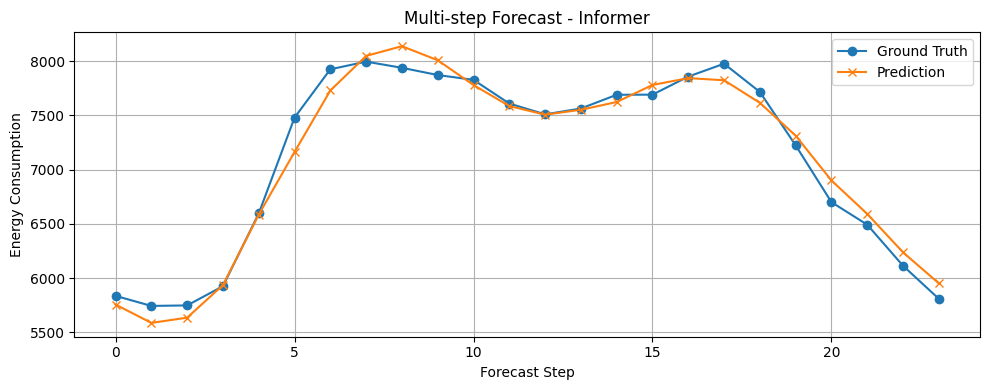

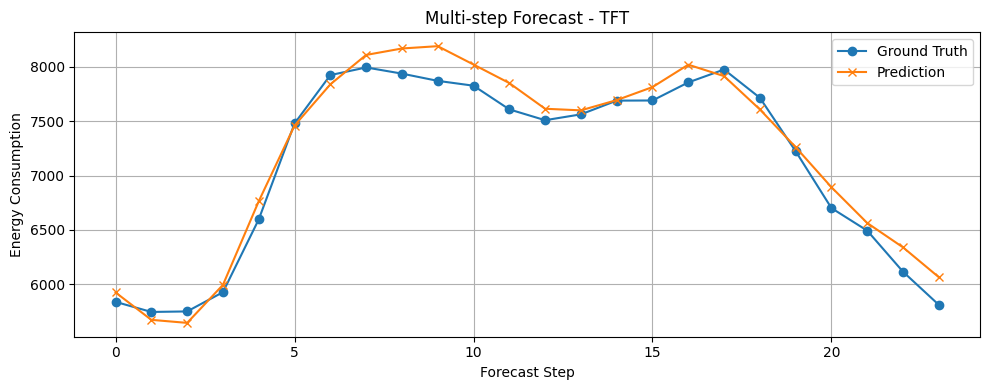

In [71]:
# Tên 2 model chính bạn muốn đánh giá
model_1 = "Informer"
model_2 = "TFT"

# Tìm sample có tổng lỗi thấp nhất cho 2 model
best_samples = find_best_fit_samples(y_test_inv, all_preds, model_1, model_2, top_k=1)
best_idx = best_samples[0][0]  # chỉ lấy index

print(f"🔍 Best-fit sample index (for {model_1} + {model_2}): {best_idx}")

# Dùng sample này để plot từng model như bạn đang làm
for model_name, y_pred in all_preds.items():
    plot_multistep_forecast(
        y_true=y_test_inv,
        y_pred=y_pred,
        steps=24,
        start_index=best_idx,
        model_name=model_name,
        save=False  # Đổi thành True nếu muốn xuất hình
    )


In [91]:
def compare_models_on_same_plot_2(y_true, pred_dict, steps=24, start_index=0):
    plt.figure(figsize=(12, 6))

    # Ground truth (always solid, bold)
    #plt.plot(range(steps), y_true[start_index], label="Ground Truth", linewidth=2.5, color='black')

    # Các model nên làm nổi bật
    solid_models = {
        "Informer": 'tab:olive',
        "TFT": 'tab:cyan'
    }

    for model_name, y_pred in pred_dict.items():
        
        if model_name in solid_models:
            plt.plot(range(steps), y_pred[start_index], label=model_name, 
                     linewidth=1.2, linestyle='--', color=solid_models[model_name], alpha=0.7)
        else:
            plt.plot(range(steps), y_pred[start_index], label=model_name, 
                     linewidth=1.2, linestyle='--', alpha=0.7)

    plt.title("Multi-step Forecast Comparison (24-hour Horizon)")
    plt.xlabel("Forecast Step")
    plt.ylabel("Energy Consumption")
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()

Best-fit Sample Index: 2040, Combined MSE: 39288.56


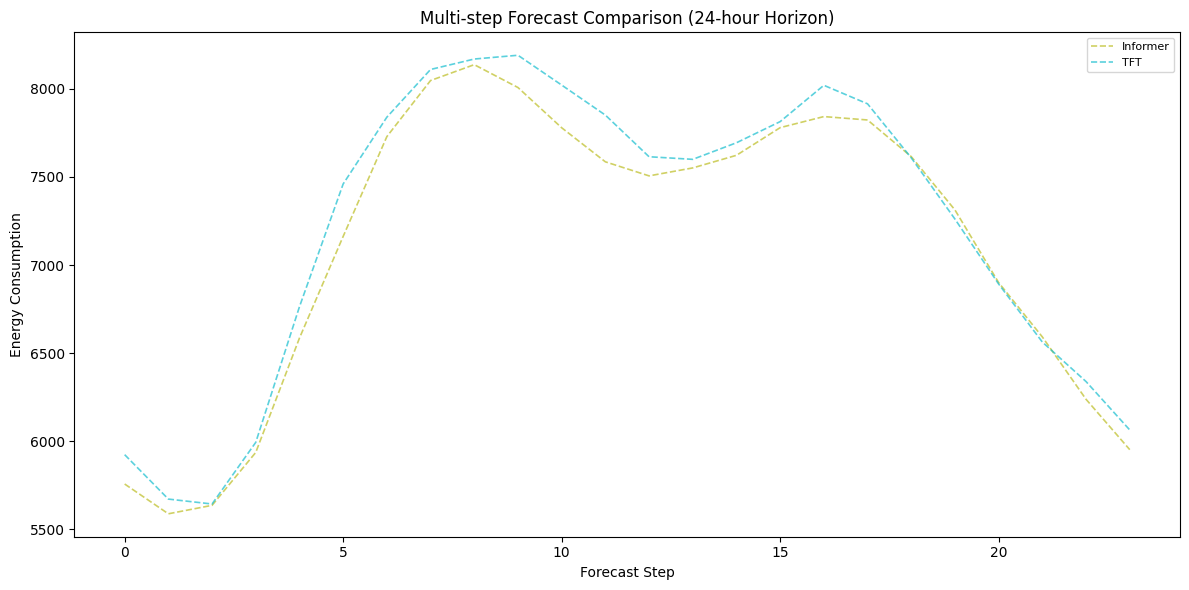

Best-fit Sample Index: 1736, Combined MSE: 39723.73


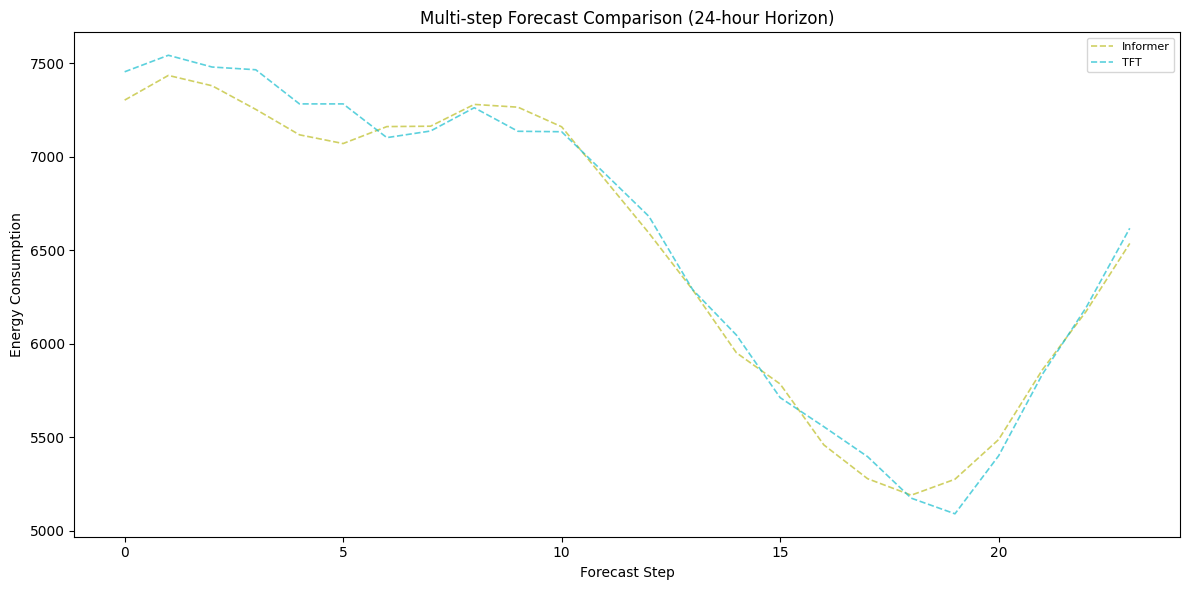

Best-fit Sample Index: 727, Combined MSE: 44643.21


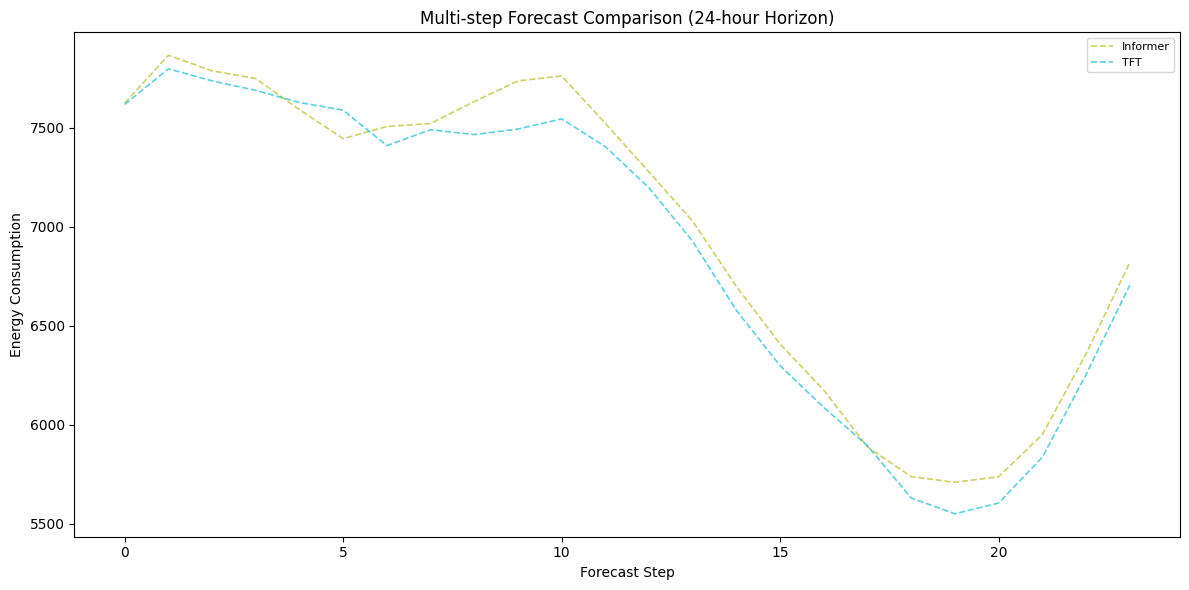

Best-fit Sample Index: 1734, Combined MSE: 50590.54


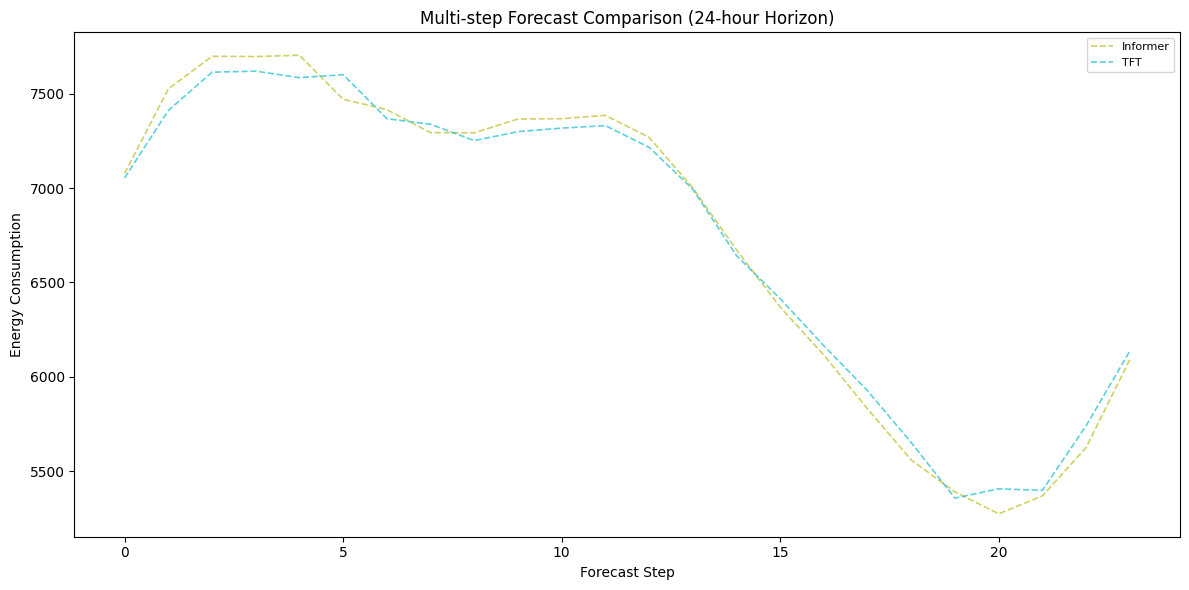

Best-fit Sample Index: 576, Combined MSE: 53121.64


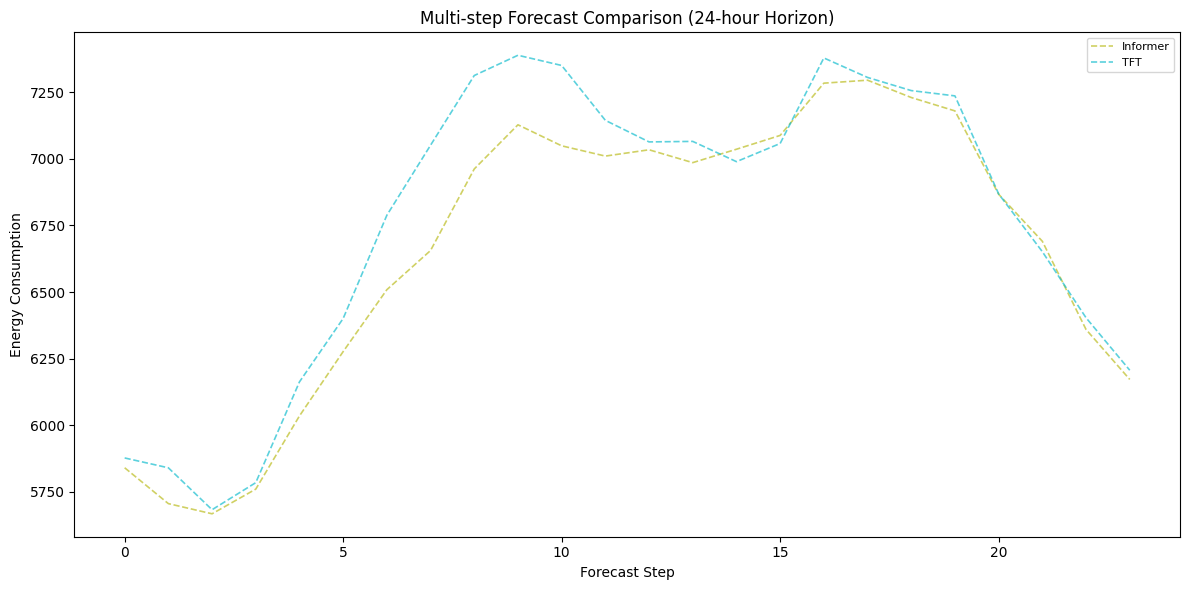

Best-fit Sample Index: 578, Combined MSE: 54453.10


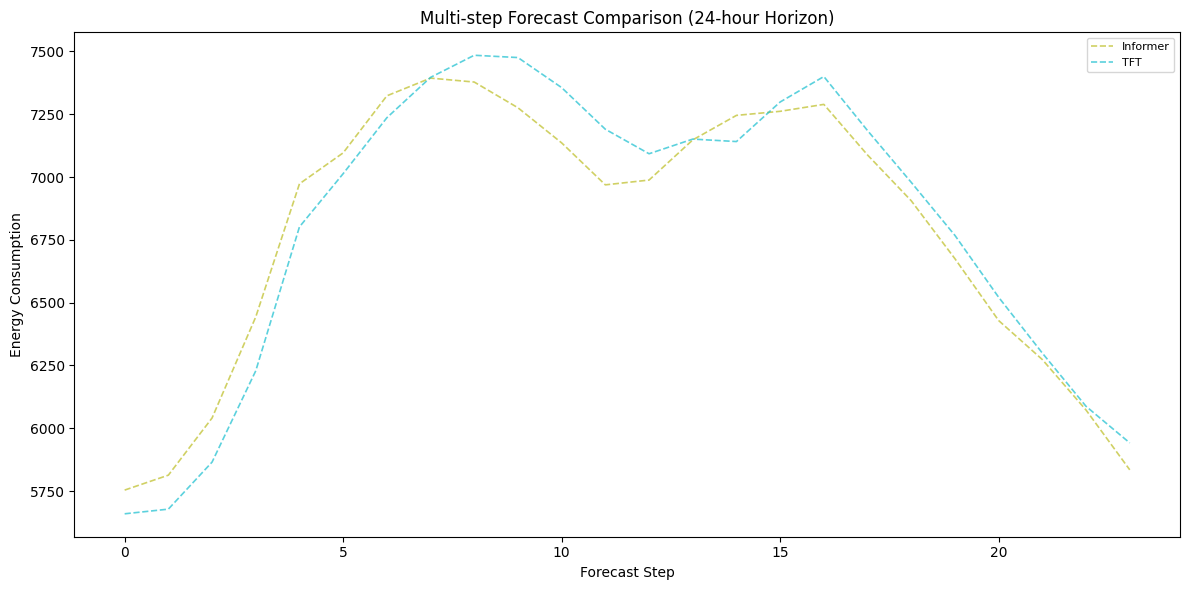

Best-fit Sample Index: 1743, Combined MSE: 54582.82


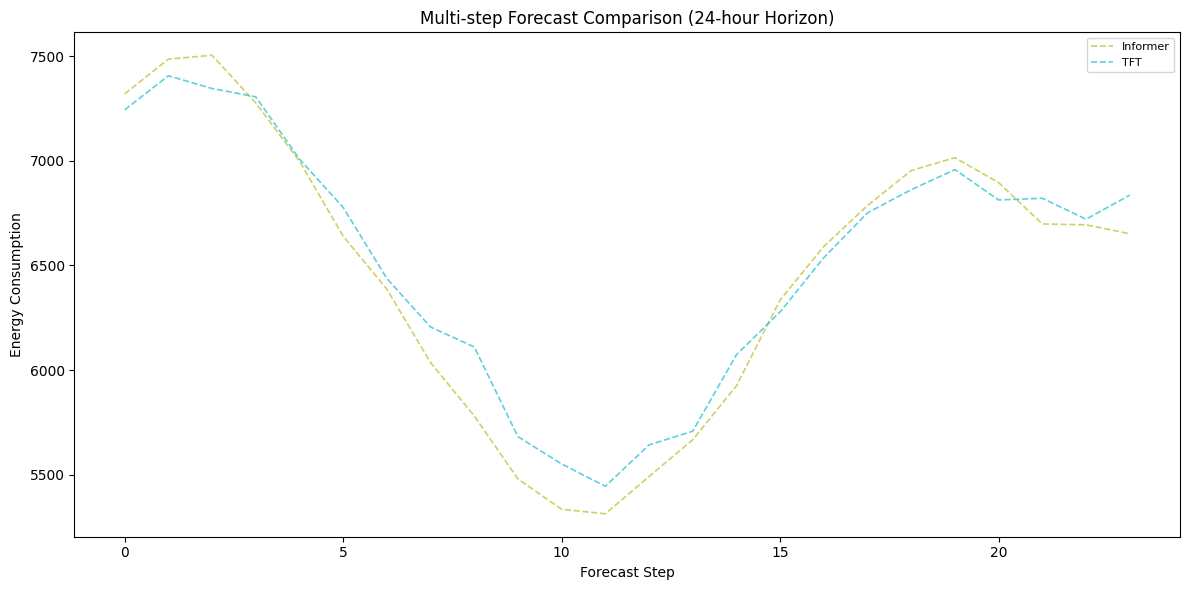

Best-fit Sample Index: 2041, Combined MSE: 56157.27


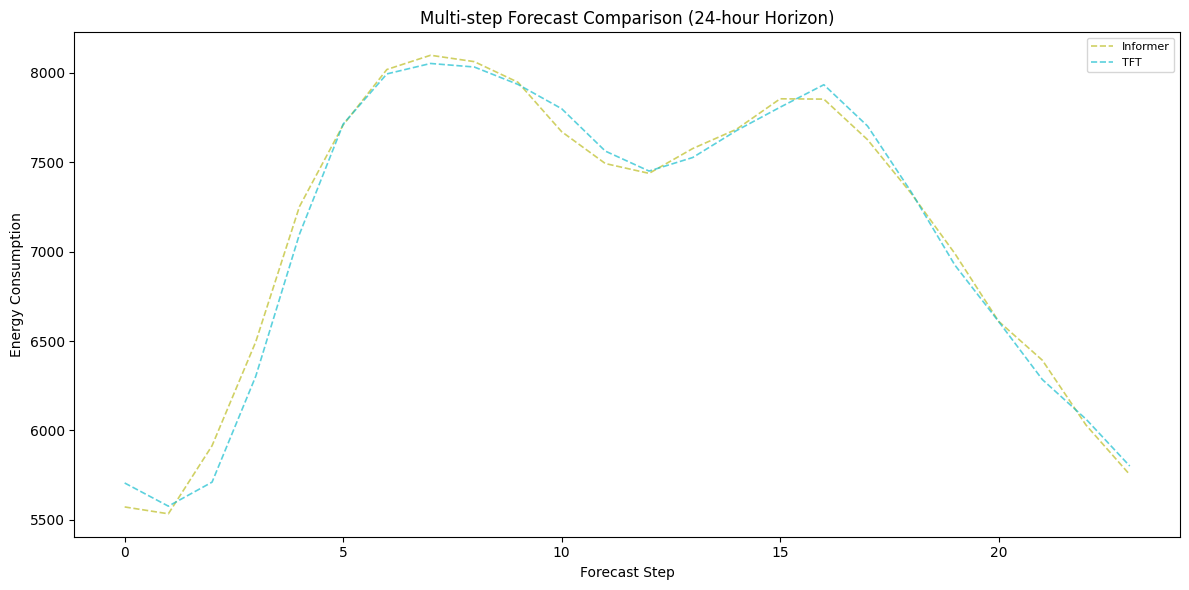

Best-fit Sample Index: 566, Combined MSE: 56466.34


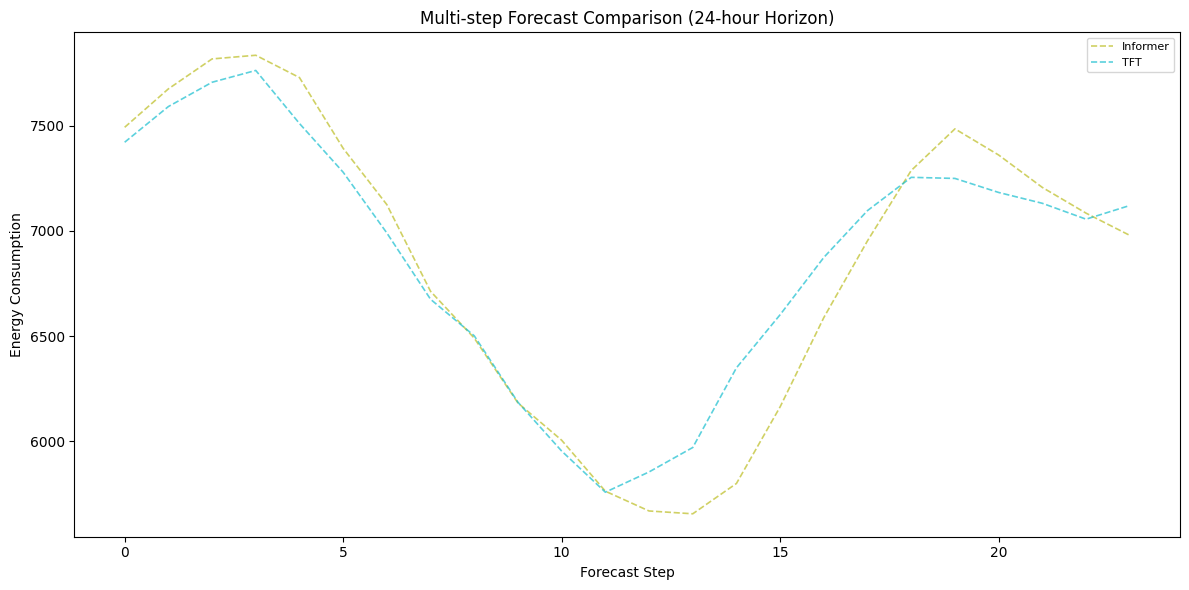

Best-fit Sample Index: 556, Combined MSE: 57228.32


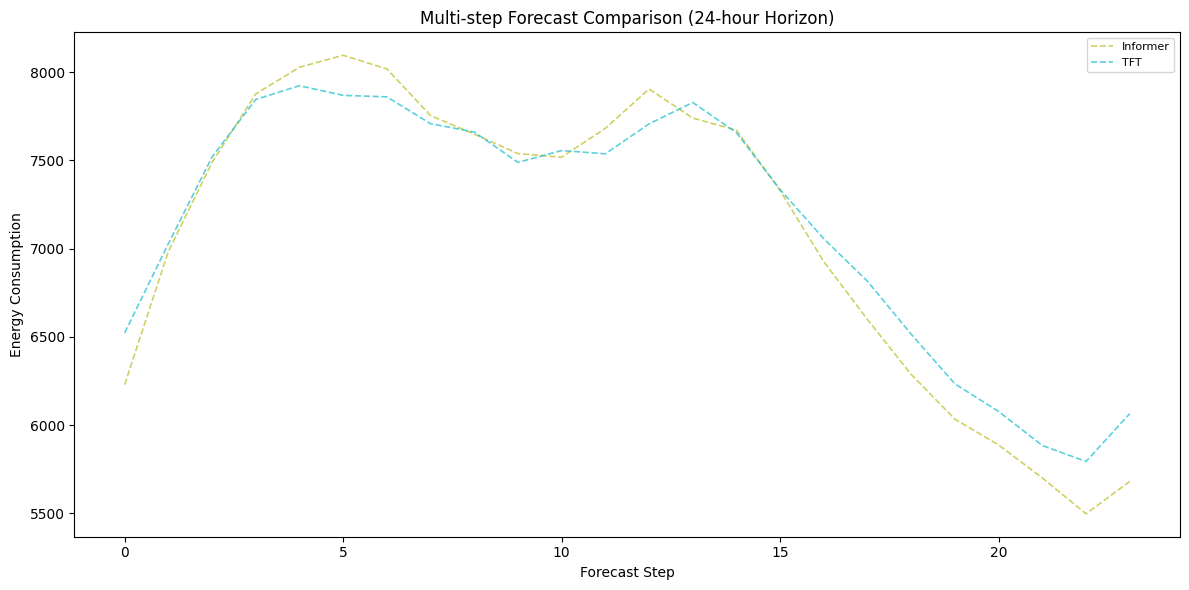

In [92]:
top_fit_samples = find_best_fit_samples(
    y_true=y_test_inv,
    pred_dict=all_preds,
    model_1="Informer",
    model_2="TFT",
    top_k=10
)

for idx, score in top_fit_samples:
    print(f"Best-fit Sample Index: {idx}, Combined MSE: {score:.2f}")
    compare_models_on_same_plot_2(y_test_inv, all_preds, start_index=idx)
